In [14]:
import pandas as pd

#Loading the dataset
df=pd.read_csv('acquisitions_update_2021.csv')

#Displaying the first and last 5 rows of the dataset to ensure that the data has been loaded correctly
df

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM


In [15]:
#Inspecting the data for missing values, data types, and summary statistics

#missing values
print(df.isnull().sum())

#data types
print(df.dtypes)

#summary statistics
print(df.describe())

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64
ID                    int64
Parent Company       object
Acquisition Year     object
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price    object
Category             object
Derived Products     object
dtype: object
                ID
count  1455.000000
mean    728.000000
std     420.166634
min       1.000000
25%     364.500000
50%     728.000000
75%    1091.500000
max    1455.000000


In [16]:
#Exploratory Data Analysis (EDA)

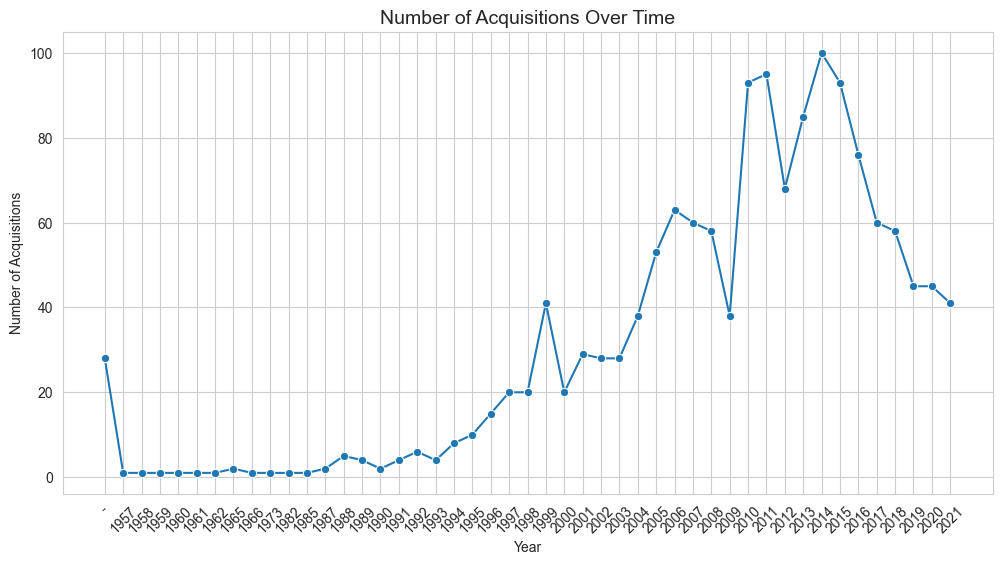

In [17]:
#1. Acquisition trends over the years - this helps us see if there were any peak years
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the plot style
sns.set_style("whitegrid")

#Count the number of acquisitions per year
acquisitions_per_year = df['Acquisition Year'].value_counts().sort_index()

#Plot the acquisitions over time
plt.figure(figsize=(12,6))
sns.lineplot(x=acquisitions_per_year.index, y=acquisitions_per_year.values, marker='o')
plt.title('Number of Acquisitions Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Acquisitions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#2. Distribution of acquisition prices - this helps us determine if there are any patterns
# in deal sizes

#Plot the distribution of acquisition prices
plt.figure(figsize=(180,60))
sns.histplot(df['Acquisition Price'], bins=30, kde=True)

plt.title('Distribution of Acquisition Prices', fontsize=14)
plt.xlabel('Acquisition Price (in Millions or Billions USD)')
plt.ylabel('Frequency')

#Format x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

Index(['ID', 'Parent Company', 'Acquisition Year', 'Acquisition Month',
       'Acquired Company', 'Business', 'Country', 'Acquisition Price',
       'Category', 'Derived Products'],
      dtype='object')


/var/folders/5h/lfh4bmg13tx6958y0qrxwkq00000gn/T/ipykernel_6224/1878211402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Acquisition Price'] = pd.to_numeric(df_subset['Acquisition Price'], errors='coerce')


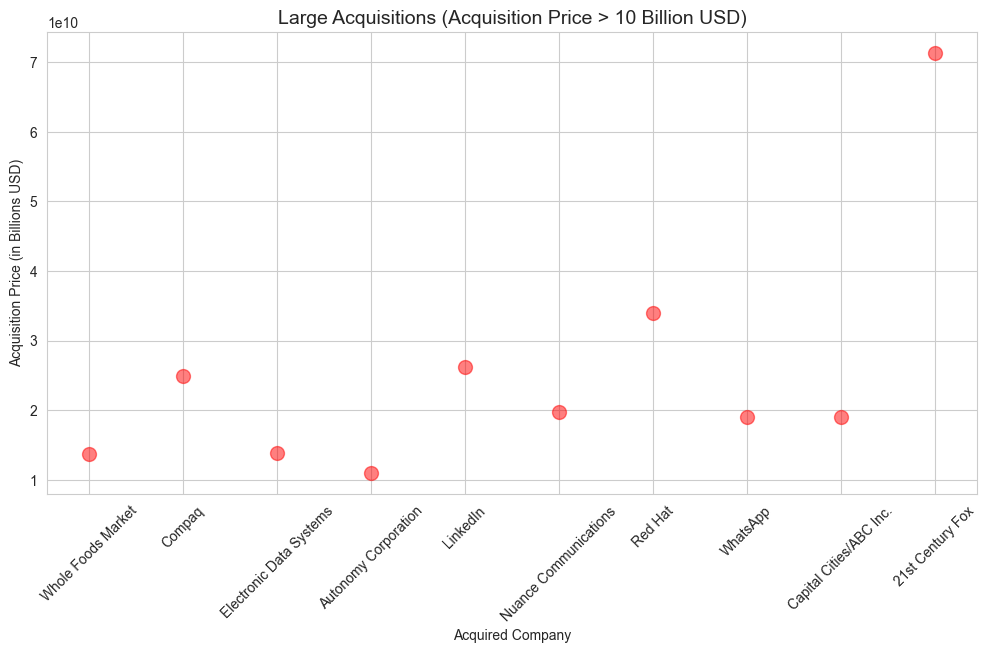

In [26]:
print(df.columns)

df_subset=df[['ID','Parent Company', 'Acquisition Year', 'Acquisition Price', 'Acquired Company', 'Business']]
df_subset['Acquisition Price'] = pd.to_numeric(df_subset['Acquisition Price'], errors='coerce')
df_subset = df_subset.dropna(subset=['Acquisition Price'])
df_subset.at[168, 'Acquisition Price'] = 86600000

#Filtering the dataset to include only large acquisitions (greater than 10 billion USD)
large_acquisitions = df_subset[df_subset['Acquisition Price'] > 9999999999]
large_acquisitions[['ID', 'Parent Company', 'Acquisition Price', 'Acquired Company']].plot(kind='scatter', x='Acquired Company', y='Acquisition Price', s=100, figsize=(12, 6), color='red', alpha=0.5)
plt.title('Large Acquisitions (Acquisition Price > 10 Billion USD)', fontsize=14)
plt.xlabel('Acquired Company')
plt.ylabel('Acquisition Price (in Billions USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#3. Comparing the average acquisition price by acquiring company - this helps us understand which companies tend to spend
# more on acquisitions

#Convert all acquisition prices to numeric values
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')


# Group by acquiring company and calculate the mean acquisition price
company_acquisition_price = df.groupby('Parent Company')['Acquisition Price'].mean().sort_values()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=company_acquisition_price.index, y=company_acquisition_price.values, palette="viridis", hue=company_acquisition_price.index)

plt.title("Average Acquisition Price by Company", fontsize=14)
plt.xlabel("Acquiring Company")
plt.ylabel("Average Acquisition Price")
plt.xticks(rotation=45)
plt.show()
